In [ ]:
! pip install gensim


In [2]:
import pandas as pd

url="https://raw.githubusercontent.com/lichengrui/glassdoor_scraping/main/data.csv"
df=pd.read_csv(url)
df = df.drop(columns=["Unnamed: 0"])
df = df.dropna(how='all')
display(df)

,rating,employLengthStatus,title,date,jobTitle,prosWords,conwords,adviceWords,responsewords
1,5.0,"Current Employee, less than 1 year",Global Business with Great People and Highly C...,"Nov 9, 2022",Engineering Director,Highly global teams with many talents and pers...,Onboarding process has been a bit messy. Lots ...,Maintain the focus on inclusion and open commu...,NaN
2,5.0,"Current Employee, less than 1 year",Great Company,"Jul 27, 2023","Sr Appl/Sys Sales Engineer in Dallas, TX",I like how everyone is very helpful.,I have no cons at this time.,NaN,NaN
3,5.0,"Current Employee, less than 1 year",新人入職,"Jul 10, 2023",Project Engr I,My experience joining Honeywell has been incre...,1. Continuous growth: As I'm still in the earl...,I suggest organizing regular cross-departmenta...,NaN
4,5.0,"Current Employee, less than 1 year",Glassdoor,"Jul 11, 2023","Feild Service Tech in Grand Rapids, MI",I like it here at Honeywell because of the amo...,The sheer size of the company makes It hard to...,The management I work under is spread thin. Bu...,NaN
5,4.0,"Current Employee, more than 1 year",Great Place for The Right People!,"Jul 7, 2023",Anonymous Employee,Honeywell is an excellent place to work for th...,*Advancement always requires relocation *Fast ...,"Keep working on succession, learning/training ...",NaN
...,...,...,...,...,...,...,...,...,...
17646,5.0,"Former Employee, more than 1 year",Best Work Life Balance,"Jun 27, 2023",Finance System Analyst,Along with great packages we can have a good w...,Job Security is a big concern in the company,NaN,NaN
17647,4.0,"Current Employee, less than 1 year",Big Company,"Jun 22, 2023","Field Service Engineer in Houston, TX","Training, Zero-Micro Management. Diverse culture.",Too big for it's own good. You are a tad-pole ...,NaN,NaN
17648,5.0,Former Employee,financial,"Jul 5, 2023","Buyer in Aguadilla, PR","Flexible, a lot of learning, many contacts","Overtime, many projects and tight deadlines.",NaN,NaN
17649,5.0,"Current Employee, less than 1 year",First Month Experience,"Jun 28, 2023",Anonymous Employee,Accepting environment Meaningful work Free dri...,Fast pace working environment Can have a lot o...,NaN,NaN


C:\Users\R\AppData\Local\Temp\ipykernel_6848\2556842055.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_grouped = df_sorted.groupby(df_sorted['date'].dt.week).count()


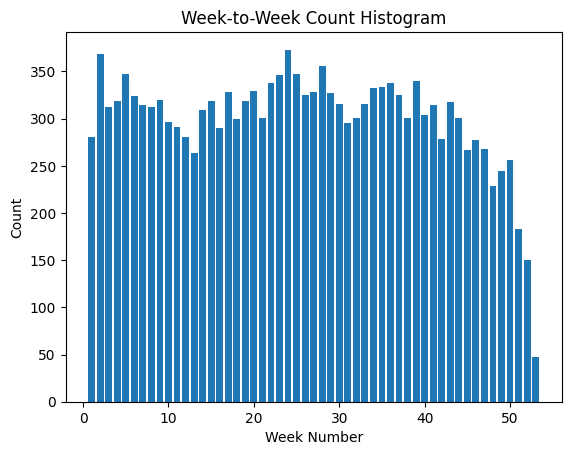

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Example DataFrame with a column named 'date'
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime format
# Assuming the 'date' column is already in datetime format
df_sorted = df.sort_values(by='date')
df_grouped = df_sorted.groupby(df_sorted['date'].dt.week).count()
plt.bar(df_grouped.index, df_grouped['date'])
plt.xlabel('Week Number')
plt.ylabel('Count')
plt.title('Week-to-Week Count Histogram')
plt.show()


In [4]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Sample DataFrame with a column of sentences


# Preprocess the sentences - tokenize and remove stop words
def preprocess_sentence(sentence):
    return [token for token in simple_preprocess(sentence) if token not in STOPWORDS]

df['processed_conwords'] = df['conwords'].apply(preprocess_sentence)

# Create a dictionary and a corpus (bag-of-words representation)
dictionary = corpora.Dictionary(df['processed_conwords'])
corpus = [dictionary.doc2bow(sentence) for sentence in df['processed_conwords']]

# Build the LDA model
num_topics = 10  # Set the number of topics
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Apply the LDA model to determine the topic for each sentence
def LDA_topic(sentence):
    sentence_bow = dictionary.doc2bow(sentence)
    topic_probabilities = lda_model.get_document_topics(sentence_bow)
    topic_index_with_highest_prob = max(topic_probabilities, key=lambda x: x[1])[0]
    return topic_index_with_highest_prob + 1

df['ldatopic'] = df['processed_conwords'].apply(LDA_topic)

# Print the DataFrame with topics
display(df)

C:\Users\R\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


,rating,employLengthStatus,title,date,jobTitle,prosWords,conwords,adviceWords,responsewords,processed_conwords,ldatopic
1,5.0,"Current Employee, less than 1 year",Global Business with Great People and Highly C...,2022-11-09,Engineering Director,Highly global teams with many talents and pers...,Onboarding process has been a bit messy. Lots ...,Maintain the focus on inclusion and open commu...,NaN,"[onboarding, process, bit, messy, lots, self, ...",10
2,5.0,"Current Employee, less than 1 year",Great Company,2023-07-27,"Sr Appl/Sys Sales Engineer in Dallas, TX",I like how everyone is very helpful.,I have no cons at this time.,NaN,NaN,"[cons, time]",8
3,5.0,"Current Employee, less than 1 year",新人入職,2023-07-10,Project Engr I,My experience joining Honeywell has been incre...,1. Continuous growth: As I'm still in the earl...,I suggest organizing regular cross-departmenta...,NaN,"[continuous, growth, early, stages, onboarding...",2
4,5.0,"Current Employee, less than 1 year",Glassdoor,2023-07-11,"Feild Service Tech in Grand Rapids, MI",I like it here at Honeywell because of the amo...,The sheer size of the company makes It hard to...,The management I work under is spread thin. Bu...,NaN,"[sheer, size, company, makes, hard, salve, pro...",8
5,4.0,"Current Employee, more than 1 year",Great Place for The Right People!,2023-07-07,Anonymous Employee,Honeywell is an excellent place to work for th...,*Advancement always requires relocation *Fast ...,"Keep working on succession, learning/training ...",NaN,"[advancement, requires, relocation, fast, pace...",6
...,...,...,...,...,...,...,...,...,...,...,...
17646,5.0,"Former Employee, more than 1 year",Best Work Life Balance,2023-06-27,Finance System Analyst,Along with great packages we can have a good w...,Job Security is a big concern in the company,NaN,NaN,"[job, security, big, concern, company]",3
17647,4.0,"Current Employee, less than 1 year",Big Company,2023-06-22,"Field Service Engineer in Houston, TX","Training, Zero-Micro Management. Diverse culture.",Too big for it's own good. You are a tad-pole ...,NaN,NaN,"[big, good, tad, pole, ocean, lot, moving, par...",7
17648,5.0,Former Employee,financial,2023-07-05,"Buyer in Aguadilla, PR","Flexible, a lot of learning, many contacts","Overtime, many projects and tight deadlines.",NaN,NaN,"[overtime, projects, tight, deadlines]",3
17649,5.0,"Current Employee, less than 1 year",First Month Experience,2023-06-28,Anonymous Employee,Accepting environment Meaningful work Free dri...,Fast pace working environment Can have a lot o...,NaN,NaN,"[fast, pace, working, environment, lot, meetin...",10


In [23]:
import pandas as pd
        
def concatenate_reviews(df, max_char_length):
    # Sort the dataframe by date and topic

    dataframe = df.rename(columns={"ldatopic": "topic", "conwords": "words"})
    dataframe = dataframe.sort_values(by=['date', 'topic'])
    
    # Initialize variables to store concatenated data
    concatenated_data = {'concatenated_string': [], 'start_time': [], 'end_time': [], 'topic': []}
    
    current_concatenated_str = ''
    current_start_time = None
    current_end_time = None
    current_topic = None
    
    for index, row in dataframe.iterrows():
        if current_topic is None:
            current_topic = row['topic']
            current_start_time = row['date']
            current_end_time = row['date']
            current_concatenated_str = row['words']
        else:
            if current_topic == row['topic'] and len(current_concatenated_str) + len(row['words']) <= max_char_length:
                current_concatenated_str += ' ' + row['words']
                current_end_time = row['date']
            else:
                concatenated_data['concatenated_string'].append(current_concatenated_str)
                concatenated_data['start_time'].append(current_start_time)
                concatenated_data['end_time'].append(current_end_time)
                concatenated_data['topic'].append(current_topic)
                
                current_topic = row['topic']
                current_start_time = row['date']
                current_end_time = row['date']
                current_concatenated_str = row['words']
    
    # Append the last batch of concatenated data
    concatenated_data['concatenated_string'].append(current_concatenated_str)
    concatenated_data['start_time'].append(current_start_time)
    concatenated_data['end_time'].append(current_end_time)
    concatenated_data['topic'].append(current_topic)
    # print(concatenated_data)

    
    # Create a new DataFrame from the concatenated data
    concatenated_df = pd.DataFrame(concatenated_data)
    

    return concatenated_df

# # Example usage
# data = {
#     'date': ['2023-08-01', '2023-08-01', '2023-08-02', '2023-08-02'],
#     'words': ['word1', 'word2', 'word3', 'word4'],
#     'topic': ['topic1', 'topic1', 'topic2', 'topic2']
# }

# df = pd.DataFrame(data)
max_length = 800
result_df = concatenate_reviews(df, max_length)

display(result_df)


,concatenated_string,start_time,end_time,topic
0,"Because it is a large company, some of the man...",2008-06-11,2008-06-11,4
1,There was constantly restructuring going on. M...,2008-06-11,2008-06-11,6
2,Despite wanting to appear progressive with HR ...,2008-06-11,2008-06-11,7
3,It is a meat market. Job security is non-exist...,2008-06-12,2008-06-12,3
4,dealing with the different companies and remem...,2008-06-12,2008-06-12,4
...,...,...,...,...
11204,Day to day can get tiresome,2023-07-27,2023-07-27,3
11205,Communication challenges: As a large organizat...,2023-07-27,2023-07-27,6
11206,Makes decision on how it will impact stock pri...,2023-07-27,2023-07-27,7
11207,I have no cons at this time.,2023-07-27,2023-07-27,8


In [29]:
def concat_more(concatenated_df, max_length):
    newstrings = []
    newstart = []
    newend = []
    newtopic = []

    for a in list(concatenated_df['topic'].unique()):
        topicdf = concatenated_df[concatenated_df['topic'] == a].sort_values(by=['start_time', 'end_time'])
        strings = topicdf['concatenated_string'].tolist()
        start = topicdf['start_time'].tolist()
        end = topicdf['end_time'].tolist()
        skip = []
        statement = False
        for i in range(len(strings)-1):
            if i not in skip:
                temp = strings[i] + " " + strings[i]
                if len(temp) < max_length:
                    if end[i + 1] < end[i]:
                        print(end[i + 1], end[i])
                    newstrings.append(temp)
                    newend.append(end[i + 1])
                    newstart.append(start[i])
                    newtopic.append(a)
                    skip.append(i+1)
                    statement = True
                else:
                    newstrings.append(temp)
                    newend.append(end[i])
                    newstart.append(start[i])
                    newtopic.append(a)
    if statement:
        return concat_more(pd.DataFrame({"concatenated_string": newstrings, "start_time": newstart, "end_time": newend, "topic": newtopic}), max_length)
    return pd.DataFrame({"concatenated_string": newstrings, "start_time": newstart, "end_time": newend, "topic": newtopic})

concat_more(result_df.sort_values(by=['start_time', 'end_time']),max_length)

,concatenated_string,start_time,end_time,topic
0,"Because it is a large company, some of the man...",2008-06-11,2008-06-12,4
1,"At the higher levels, the political gaming is ...",2008-08-06,2008-08-06,4
2,the company has trouble growing and take less ...,2008-08-16,2009-07-25,4
3,Very political Difficult to move from one busi...,2009-08-16,2010-01-06,4
4,"Bureaucracy, everything is political, very eas...",2010-02-04,2010-02-27,4
...,...,...,...,...
1808,"Fortunately, No Cons till date Fortunately, No...",2022-12-27,2023-01-21,8
1809,Too good to be true Too good to be true Too go...,2023-01-24,2023-03-09,8
1810,"It's a very good company, no cons It's a very ...",2023-03-10,2023-04-06,8
1811,No particular cons are there No particular con...,2023-04-08,2023-05-06,8


In [30]:
display(df)

,rating,employLengthStatus,title,date,jobTitle,prosWords,conwords,adviceWords,responsewords,processed_conwords,ldatopic
1,5.0,"Current Employee, less than 1 year",Global Business with Great People and Highly C...,2022-11-09,Engineering Director,Highly global teams with many talents and pers...,Onboarding process has been a bit messy. Lots ...,Maintain the focus on inclusion and open commu...,NaN,"[onboarding, process, bit, messy, lots, self, ...",10
2,5.0,"Current Employee, less than 1 year",Great Company,2023-07-27,"Sr Appl/Sys Sales Engineer in Dallas, TX",I like how everyone is very helpful.,I have no cons at this time.,NaN,NaN,"[cons, time]",8
3,5.0,"Current Employee, less than 1 year",新人入職,2023-07-10,Project Engr I,My experience joining Honeywell has been incre...,1. Continuous growth: As I'm still in the earl...,I suggest organizing regular cross-departmenta...,NaN,"[continuous, growth, early, stages, onboarding...",2
4,5.0,"Current Employee, less than 1 year",Glassdoor,2023-07-11,"Feild Service Tech in Grand Rapids, MI",I like it here at Honeywell because of the amo...,The sheer size of the company makes It hard to...,The management I work under is spread thin. Bu...,NaN,"[sheer, size, company, makes, hard, salve, pro...",2
5,4.0,"Current Employee, more than 1 year",Great Place for The Right People!,2023-07-07,Anonymous Employee,Honeywell is an excellent place to work for th...,*Advancement always requires relocation *Fast ...,"Keep working on succession, learning/training ...",NaN,"[advancement, requires, relocation, fast, pace...",2
...,...,...,...,...,...,...,...,...,...,...,...
17646,5.0,"Former Employee, more than 1 year",Best Work Life Balance,2023-06-27,Finance System Analyst,Along with great packages we can have a good w...,Job Security is a big concern in the company,NaN,NaN,"[job, security, big, concern, company]",6
17647,4.0,"Current Employee, less than 1 year",Big Company,2023-06-22,"Field Service Engineer in Houston, TX","Training, Zero-Micro Management. Diverse culture.",Too big for it's own good. You are a tad-pole ...,NaN,NaN,"[big, good, tad, pole, ocean, lot, moving, par...",5
17648,5.0,Former Employee,financial,2023-07-05,"Buyer in Aguadilla, PR","Flexible, a lot of learning, many contacts","Overtime, many projects and tight deadlines.",NaN,NaN,"[overtime, projects, tight, deadlines]",1
17649,5.0,"Current Employee, less than 1 year",First Month Experience,2023-06-28,Anonymous Employee,Accepting environment Meaningful work Free dri...,Fast pace working environment Can have a lot o...,NaN,NaN,"[fast, pace, working, environment, lot, meetin...",10


In [26]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

def preprocess_sentence(sentence):
    return [token for token in simple_preprocess(sentence) if token not in STOPWORDS]

def LDA_topic(sentence):
    sentence_bow = dictionary.doc2bow(sentence)
    topic_probabilities = lda_model.get_document_topics(sentence_bow)
    topic_index_with_highest_prob = max(topic_probabilities, key=lambda x: x[1])[0]
    return topic_index_with_highest_prob + 1

def concatenate_reviews(df, max_char_length):
    dataframe = df.rename(columns={"ldatopic": "topic", "conwords": "words"})
    dataframe = dataframe.sort_values(by=['date', 'topic'])
    concatenated_data = {'concatenated_string': [], 'start_time': [], 'end_time': [], 'topic': []}
    current_concatenated_str = ''
    current_start_time = None
    current_end_time = None
    current_topic = None
    for index, row in dataframe.iterrows():
        if current_topic is None:
            current_topic = row['topic']
            current_start_time = row['date']
            current_end_time = row['date']
            current_concatenated_str = row['words']
        else:
            if current_topic == row['topic'] and len(current_concatenated_str) + len(row['words']) <= max_char_length:
                current_concatenated_str += ' ' + row['words']
                current_end_time = row['date']
            else:
                concatenated_data['concatenated_string'].append(current_concatenated_str)
                concatenated_data['start_time'].append(current_start_time)
                concatenated_data['end_time'].append(current_end_time)
                concatenated_data['topic'].append(current_topic)
                
                current_topic = row['topic']
                current_start_time = row['date']
                current_end_time = row['date']
                current_concatenated_str = row['words']

    concatenated_data['concatenated_string'].append(current_concatenated_str)
    concatenated_data['start_time'].append(current_start_time)
    concatenated_data['end_time'].append(current_end_time)
    concatenated_data['topic'].append(current_topic)
    concatenated_df = pd.DataFrame(concatenated_data)
    return concatenated_df

def concat_more(concatenated_df, max_length):
    newstrings = []
    newstart = []
    newend = []
    newtopic = []

    for a in list(concatenated_df['topic'].unique()):
        topicdf = concatenated_df[concatenated_df['topic'] == a].sort_values(by=['start_time'])
        strings = topicdf['concatenated_string'].tolist()
        start = topicdf['start_time'].tolist()
        end = topicdf['end_time'].tolist()
        skip = []
        
        for i in range(len(strings)-1):
            statement = True
            if i not in skip:
                temp = strings[i] + " " + strings[i]
                if len(temp) < max_length and statement and (end[i + 1]-start[i]).days < 30:
                    if end[i + 1] < end[i]:
                        print(end[i + 1], end[i])
                    newstrings.append(temp)
                    newend.append(end[i + 1])
                    newstart.append(start[i])
                    newtopic.append(a)
                    skip.append(i+1)
                    statement = False
                else:
                    newstrings.append(temp)
                    newend.append(end[i])
                    newstart.append(start[i])
                    newtopic.append(a)
                    statement= True
    if statement:
        return concat_more(pd.DataFrame({"concatenated_string": newstrings, "start_time": newstart, "end_time": newend, "topic": newtopic}), max_length)
    return pd.DataFrame({"concatenated_string": newstrings, "start_time": newstart, "end_time": newend, "topic": newtopic})

url="https://raw.githubusercontent.com/lichengrui/glassdoor_scraping/main/data.csv"
df=pd.read_csv(url)
df = df.drop(columns=["Unnamed: 0"])
df = df.dropna(how='all')
df['date'] = pd.to_datetime(df['date']) 
df['processed_conwords'] = df['conwords'].apply(preprocess_sentence)

dictionary = corpora.Dictionary(df['processed_conwords'])
corpus = [dictionary.doc2bow(sentence) for sentence in df['processed_conwords']]

num_topics = 10  # Set the number of topics
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

df['ldatopic'] = df['processed_conwords'].apply(LDA_topic)

max_length = 800
result_df = concatenate_reviews(df, max_length)

resultingdf = concat_more(result_df.sort_values(by=['start_time']),max_length)

In [30]:
max_length = 1000
result_df = concatenate_reviews(df, max_length)

resultingdf = concat_more(result_df.sort_values(by=['start_time']),max_length)
resultingdf['days_in_between'] = (resultingdf['end_time'] - resultingdf['start_time']).dt.days
resultingdf.sort_values(by=['days_in_between'], ascending=False).drop_duplicates()

,concatenated_string,start_time,end_time,topic,days_in_between
12,being such a big company sometime you feel you...,2009-02-13,2009-03-16,1,31
2129,just now we entered into Catchpoint tool just ...,2015-12-08,2016-01-06,10,29
3530,Job security. Layoffs have impacted employee m...,2010-10-23,2010-11-21,3,29
4986,Comparatively low salary than peers...career g...,2015-01-15,2015-02-13,6,29
5327,I can't think of any I can't think of any,2016-01-13,2016-02-11,8,29
...,...,...,...,...,...
1328,"Often when someone quit, (which was often afte...",2017-10-27,2017-10-27,4,0
1324,1. Employee's are treated badly with absolutel...,2017-10-10,2017-10-10,4,0
2883,No work/life balance Continuous travel preven...,2022-09-14,2022-09-14,7,0
1321,"Process heavy, traditional management style, ...",2017-09-28,2017-09-28,4,0
